<a href="https://colab.research.google.com/github/steve-burman/machine-learning-intro/blob/master/TensorFlow_SXB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning / AI Workbench
* Steve Burman
* architect & developer at Jeppesen, Inc
* 303-249-1177
* steve.burman@jeppesen.com

---

**Run this section to setup:**

In [2]:
# Define common functions
message = "Welcome to Steve's Machine Learning / AI Workbench"
print( message )

from urllib.request import urlretrieve
import numpy as np
from numpy import loadtxt
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
import graphviz

%tensorflow_version  2.x
import  tensorflow  as  tf
print( "tf.__version__:", tf.__version__ )

# analyze dataset
def analyze_dataset(bunch):
  print( "Dataset details::" )
  print( "feature_names = ", bunch.feature_names )
  print( "target_names = ", bunch.target_names )
  # print( "DESCR = ", bunch.DESCR[0:20] )
  print( "data[0:4] = ", bunch.data[0:4] )
  print( "target[0:4] = ", bunch.target[0:4] )

def load_pima_diabetes():
  # https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
  # https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names
  bunch = Bunch()
  bunch.target_names = [ 'Class 0', 'Class 1']
  bunch.feature_names = [
      'Times pregnant'
    , 'Plasma glucose concentration'
    , 'Diastolic blood pressure (mm Hg)'
    , 'Triceps skin fold thickness (mm)'
    , '2-Hour serum insulin (mu U/ml)'
    , 'Body mass index (weight in kg/(height in m)^2)'
    , 'Diabetes pedigree function'
    , 'Age (years)'
  ]
  urlretrieve( url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
    , filename="pima-indians-diabetes.csv" )
  dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
  bunch.data = dataset[:,0:8]
  bunch.target = dataset[:,8]
  return bunch

print( "Setup complete" )

Welcome to Steve's Machine Learning / AI Workbench
tf.__version__: 2.1.0
Setup complete


### Load Iris dataset

In [0]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
analyze_dataset( iris_dataset )
# print( "iris_dataset:", iris_dataset )
for i in range( len( iris_dataset.target_names ) ):
  print( "Example: %d: label %s, features %s" % ( i, iris_dataset.target_names[i], iris_dataset.data[i] ) )


### Load Hand-written digits dataset

[MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset, which is ~60K "Labelled" image files of hand-written digits.

![MNIST dataset](https://miro.medium.com/max/479/1*yBdJCRwIJGoM7pwU-LNW6Q.png)

In [4]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

print( "MNIST dataset loaded" )

MNIST dataset loaded


### Load Pima Indians diabetes dataset
Collaboration with Doug Eglseder


Reference: [Jason Brownlee PhD](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

![Pima Indians](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/04/Tour-of-Deep-Learning-Algorithms.jpg)


In [0]:
# load Pima dataset
pima_diabetes_dataset = load_pima_diabetes()
analyze_dataset( pima_diabetes_dataset )

# Linear Regression
best fit using objective function:  y = m * x + b

In [0]:
import  matplotlib.pyplot  as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model

%matplotlib inline

def  createSimulatedData( m=0.1, b=0.3, n=100, stddev=0.1 ):
  x = tf.random.uniform( shape=( n, ) )
  noise = tf.random.normal( shape=( len(x), ), stddev=stddev )
  y = m * x + b + noise
  return x, y

def calculateLineSlope(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  m = dy / dx
  return m

In [0]:
m = calculateLineSlope( 6.9528, 46.3015, 7.0458, 46.1395 )
x_train, y_train = createSimulatedData( m, 46.3015, 200 )
plt.plot( x_train, y_train, 'b.' )

# Decision Tree

Setup

In [0]:
from sklearn import tree

# Train classifier
def train_DecisionTreeClassifier( dataset ):
  # set aside some of dataset as train_data and some as test_data (X=data, y=target)
  train_data, test_data, train_target, test_target = train_test_split( dataset.data, dataset.target, test_size=0.25, random_state=42 )
  print( "train_data[:5]:", train_data[:5] )
  print( "test_data[:5]:", test_data[:5] )
  print( "train_target:", train_target )
  print( "test_target:", test_target )
  # build Decision Tree Classifier
  classifier = tree.DecisionTreeClassifier()
  estimator = classifier.fit( train_data, train_target )
  return train_data, test_data, train_target, test_target, classifier

def visualize_decision_tree(classifier, dataset):
  # tree.plot_tree( classifier.fit( dataset.data, dataset.target ) )
  dot_data = tree.export_graphviz( classifier, out_file=None,
                      feature_names=dataset.feature_names,
                      class_names=dataset.target_names,
                      filled=True, rounded=True,
                      special_characters=True, precision=2)
  graph = graphviz.Source( dot_data )
  return graph

print( "Setup complete" )

## Train classifier

In [0]:
train_data, test_data, train_target, test_target, classifier = train_DecisionTreeClassifier( iris_dataset )
print( "Iris DecisionTreeClassifier trained" )

# train_data, test_data, train_target, test_target, classifier = train_DecisionTreeClassifier( pima_diabetes_dataset )
# print( "Pima Indian Diabetes DecisionTreeClassifier trained" )


## Predict label for new observation

In [0]:
# Predict label for new observation
prediction = classifier.predict( test_data )
print( "test_target:", test_target )
print( "prediction: ", prediction )

## Visualize decision tree

In [0]:
# Visualize decision tree
visualize_decision_tree( classifier, iris_dataset )
# visualize_decision_tree( classifier, pima_diabetes_dataset )

# Neural Networks

Setup

In [6]:
import  matplotlib.pyplot  as plt
%matplotlib inline

from sklearn  import preprocessing

from keras.utils import to_categorical

from  tensorflow.keras  import Model
from  tensorflow.keras  import Sequential
from  tensorflow.keras.layers  import Dense
from  tensorflow.keras.layers  import Dropout

# Chart training progress
def plot_training_progress(history):
  accuracy     = history.history[     'accuracy' ]
  val_accuracy = history.history[ 'val_accuracy' ]
  loss     = history.history[     'loss' ]
  val_loss = history.history[ 'val_loss' ]
  epochs = range( len( accuracy ) )

  plt.title( 'Training & Validation Accuracy' )
  plt.plot( epochs,     accuracy, color='green',   label='Training' )
  plt.plot( epochs, val_accuracy, color='orange', label='Validation' )
  plt.xlabel( 'Epoch' )
  plt.ylabel( 'Accuracy' )
  plt.legend()
  _ = plt.figure()

  plt.title( 'Training & Validation Loss' )
  plt.plot( epochs,     loss, color='red', label='Loss' )
  plt.plot( epochs, val_loss, color='orange', label='Validation' )
  plt.xlabel( 'Epoch' )
  plt.ylabel( 'Loss' )
  plt.legend()
  _ = plt.figure()

print( "Neural Network Setup complete" )

Neural Network Setup complete


### Build & Train Iris Model

**Build Model**

In [0]:
X = preprocessing.scale( iris_dataset.data )
y = to_categorical( iris_dataset.target )
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.25, random_state=42
)

model = Sequential(
    [
     Dense( 10, input_dim=4, activation='relu' )
     , Dense( 3, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )

**Train Model**

In [0]:
training_history = model.fit( X_train, y_train, validation_data=(X_test, y_test), epochs=200 )

### MNIST (recognize objects in images)


Build "Model" using Keras, which calls TensorFlow implementation:

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


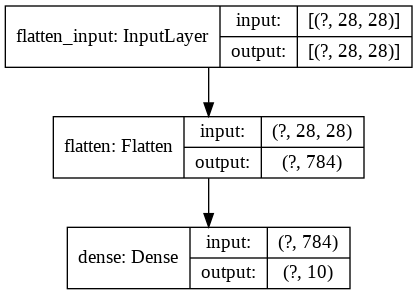

In [7]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Flatten( input_shape=[28, 28] )
    #  , tf.keras.layers.Dense( 128, activation='relu' )
    #  , tf.keras.layers.Dropout( 0.2 )
     , tf.keras.layers.Dense( 10, activation='softmax' )
    ]
)

model.compile(
    optimizer = 'adam'
    , loss = 'sparse_categorical_crossentropy'
    , metrics = [ 'accuracy' ]
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )

Train & evaluate model:

In [8]:
training_history = model.fit( X_train, y_train, validation_data=(X_test, y_test), epochs=5 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4658 - accuracy: 0.8779 - val_loss: 0.3040 - val_accuracy: 0.9177
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3036 - accuracy: 0.9148 - val_loss: 0.2811 - val_accuracy: 0.9230
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2831 - accuracy: 0.9209 - val_loss: 0.2720 - val_accuracy: 0.9245
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2727 - accuracy: 0.9232 - val_loss: 0.2809 - val_accuracy: 0.9213
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2665 - accuracy: 0.9259 - val_loss: 0.2648 - val_accuracy: 0.9261


In [9]:
eval_results = model.evaluate( X_test, y_test )
eval_results

10000/10000 [==============================] - 0s 38us/sample - loss: 0.2648 - accuracy: 0.9261


[0.26480166885703804, 0.9261]

Visualize Learned Network "Weights":

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


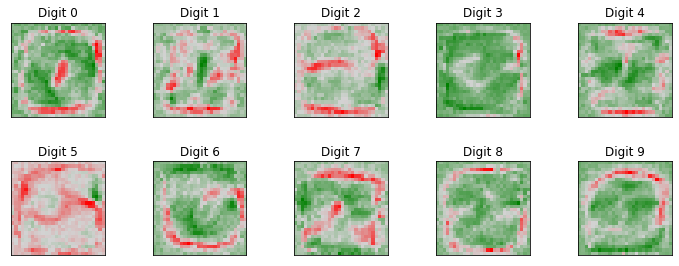

In [10]:
from  matplotlib.colors import LinearSegmentedColormap

model.summary()

def  show_layer_weights(p_digit_number):
  dense_layer = model.layers[1]
  weights_inspect = dense_layer.get_weights()[0]
  dense_layer_weights = []
  for connection in weights_inspect:
    weight = connection[ p_digit_number ]
    dense_layer_weights.append( weight )
  dense_layer_weights
  img = tf.reshape( dense_layer_weights, [28, 28] )
  # plt.imshow( img, cmap = cmap )
  return img

fig, axes = plt.subplots( 2, 5, figsize=(10, 4) )
fig.tight_layout()
axes = axes.reshape(-1)
for digit_number in range( 0, 10 ):
  title = "Digit " + str( digit_number )
  a = axes[ digit_number ]
  img = show_layer_weights( digit_number )
  cmap = LinearSegmentedColormap.from_list( 'rg', ["red", "lightgray", "green"], N=256 )
  a.imshow( img, cmap = cmap )
  a.set_title( title )
  a.set_xticks(()) # ticks be gone
  a.set_yticks(())

plt.show()


## Chart the Model's "Learning" progress:

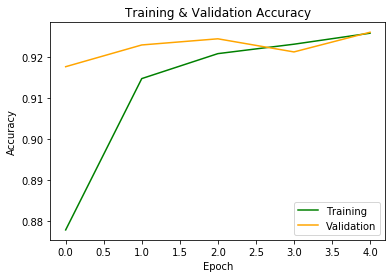

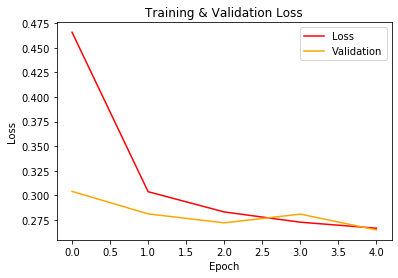

<Figure size 432x288 with 0 Axes>

In [11]:
# Chart training progress
plot_training_progress( training_history )

## Convolution

Setup...

In [0]:
import scipy
from skimage  import color, data

%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version  2.x
import  tensorflow  as  tf
print( tf.__version__ )

from  tensorflow.keras  import Model


Load Data

In [0]:
img = data.astronaut()
img = color.rgb2gray( img )
plt.axis( 'off' )
plt.imshow( img, cmap=plt.cm.gray )
plt.title( 'Eileen Collins, 1st Woman Shuttle Commander' )

Build Model:

In [0]:
model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Conv2D( name = 'Edges_from_Pixels'
        , filters = 4
        , kernel_size = ( 4, 4 )
        , input_shape = ( 10, 10, 3 )
    )
)

model.add(
    tf.keras.layers.Conv2D( name = 'Shapes_from_Edges'
        , filters = 8
        , kernel_size = ( 3, 3 )
    )
)

model.summary()
tf.keras.utils.plot_model( model, 'skip_connection.png', show_shapes=True )
